# Section A

In [85]:
import pandas as pd
import numpy as np
import os
import glob
from sklearn import preprocessing
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import DistanceMetric

In [86]:
data = pd.read_excel('test.xlsx')

### Label Encoder

Converts strings to token numbers

In [87]:
features = ['Region', 'Grid reference', 'LGA', 'Primary Care Partnership', 'Medicare Local', 'DHS Area', 
            'Top industry', '2nd top industry - persons', '3rd top industry - persons', 'Top occupation', '2nd top occupation - persons', 
            '3rd top occupation - persons', 'Top country of birth', '2nd top country of birth', '3rd top country of birth', 
            '4th top country of birth', '5th top country of birth', 'Top language spoken', '2nd top language spoken', '3rd top language spoken',
            '4th top language spoken', '5th top language spoken', 'Nearest Public Hospital', 'Nearest public hospital with maternity services',
            'Nearest public hospital with emergency department']

for i in range(len(data)):
    for j in range(1,225):
        if data.iloc[i,j]=='<5':
            data.iloc[i,j] =  5
            
label_encoder_list = []

for feature in features:
    le = preprocessing.LabelEncoder()
    data[feature] = le.fit_transform(data[feature])

    print("Feature: ", feature, " Classes: ", le.classes_)
    label_encoder_list.append(le)

Feature:  Region  Classes:  ['Eastern Metropolitan' 'Northern and Western Metropolitan'
 'Southern Metropolitan']
Feature:  Grid reference  Classes:  ['A1' 'A3' 'B1' 'B2' 'B3' 'B4' 'C1' 'C2' 'C3' 'C4' 'D1' 'D2' 'D3' 'D5'
 'E2' 'E4']
Feature:  LGA  Classes:  ['Darebin (C)' 'Glen Eira (C)' 'Greater Dandenong (C)' 'Hume (C)'
 'Kingston (C)' 'Maribyrnong (C)' 'Maroondah (C)' 'Melbourne (C)'
 'Moonee Valley (C)' 'Moreland (C)' 'Mornington Peninsula (S)'
 'Port Phillip (C)' 'Stonnington (C)']
Feature:  Primary Care Partnership  Classes:  ['Frankston - Mornington Peninsula Primary Care Partnership'
 "HealthWest (b): Hobson's Bay, Maribyrnong, Wyndham Primary Care Partnership"
 'Hume-Whittlesea Primary Care Partnership'
 'Inner North West Primary Care Partnership'
 'Inner South East Partnership in Community & Health'
 'Kingston - Bayside Primary Care Partnership'
 'North East Primary Care Partnership'
 'Outer East Primary Care Partnership'
 'South East Healthy Communities Partnership']
Feature

### Encoding Locations

Representing location information in terms of distance (in kilometers) and direction (in degrees)

In [88]:
dir = {'N':0.00,'NbE':11.25,'NNE':22.50,'NEbN':33.75,'NE':	45.00,'NEbE':56.25,'ENE':67.50,'EbN':78.75,'E':90.00,'EbS':101.25,'ESE':112.50,
     'SEbE':123.75,'SE':135.00,'SEbS':146.25,'SSE':157.50,'SbE':168.75,'S':180.00,'SbW':191.25,'SSW':202.50,'SWbS':213.75,'SW':225.00,'SWbW':236.25,
     'WSW':247.50,'WbS':258.75,'W':270.00,'WbN':281.25,'WNW':292.50,'NWbW':303.75,'NW':315.00,'NWbN':326.25,'NNW':337.50,'NbW':348.75}

In [89]:
distance, direction = [], []

for i in range(len(data)):
    distance.append(data['Location'][i].split()[0].replace('km',''))
    direction.append(dir[data['Location'][i].split()[1]])

data['Distance']    = distance
data['Direction']   = direction
data.drop('Location', inplace=True, axis=1)
data.head(0)


,Community Name,Region,Map reference,Grid reference,Population Density,Travel time to GPO (minutes),Distance to GPO (km),LGA,Primary Care Partnership,Medicare Local,...,"Presentations to emergency departments, 2012-13",Nearest public hospital with emergency department,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %",Distance,Direction


## Question A.1

### Category: Land Use

### Category: Socio-Demographic

In [90]:
land_use_columns = ['Community Name','Commercial (km^2)','Commercial (%)','Industrial (km^2)','Industrial (%)',
                    'Residential (km^2)','Residential (%)','Rural (km^2)','Rural (%)','Other (km^2)',
                    'Other (%)', 'Area (km^2)', 'Population Density']

print("Number of selected features: ", len(land_use_columns))

Number of selected features:  13


In [91]:
land_data = data.loc[:,land_use_columns]

In [92]:
suburbs       = land_data['Community Name']
suburb_labels = []

for i in range(len(suburbs)):
    suburb_labels.append(suburbs[i].replace(' (Suburb)',''))

land_data.drop('Community Name', inplace=True, axis=1)

In [93]:
scaler  = MinMaxScaler()

land_scaled_data  = scaler.fit_transform(land_data)

In [94]:
for feature, data_min, data_max, data_scale, data_range in zip(scaler.feature_names_in_, scaler.data_min_, scaler.data_max_, scaler.scale_, scaler.data_range_):
    print("Feature: ", feature, "Min: ", data_min, "Max: ", data_max, "Scale: ", data_scale, "Range: ", data_range) 

Feature:  Commercial (km^2) Min:  0.0 Max:  1.013147034856194 Scale:  0.9870235667638705 Range:  1.013147034856194
Feature:  Commercial (%) Min:  0.0 Max:  23.42576710058369 Scale:  0.042688036456022115 Range:  23.42576710058369
Feature:  Industrial (km^2) Min:  0.0 Max:  2.256758882993973 Scale:  0.44311335496919835 Range:  2.256758882993973
Feature:  Industrial (%) Min:  0.0 Max:  49.24655164026461 Scale:  0.02030599030171256 Range:  49.24655164026461
Feature:  Residential (km^2) Min:  0.00696337099861 Max:  10.37055195451223 Scale:  0.0964916729317872 Range:  10.36358858351362
Feature:  Residential (%) Min:  0.02292101462795175 Max:  88.06791019916382 Scale:  0.011357829778411047 Range:  88.04498918453586
Feature:  Rural (km^2) Min:  0.0 Max:  7.05021250816 Scale:  0.14183969615704323 Range:  7.05021250816
Feature:  Rural (%) Min:  0.0 Max:  39.71142343395186 Scale:  0.02518167100363961 Range:  39.71142343395186
Feature:  Other (km^2) Min:  0.19194624706776 Max:  26.34743918596639 S

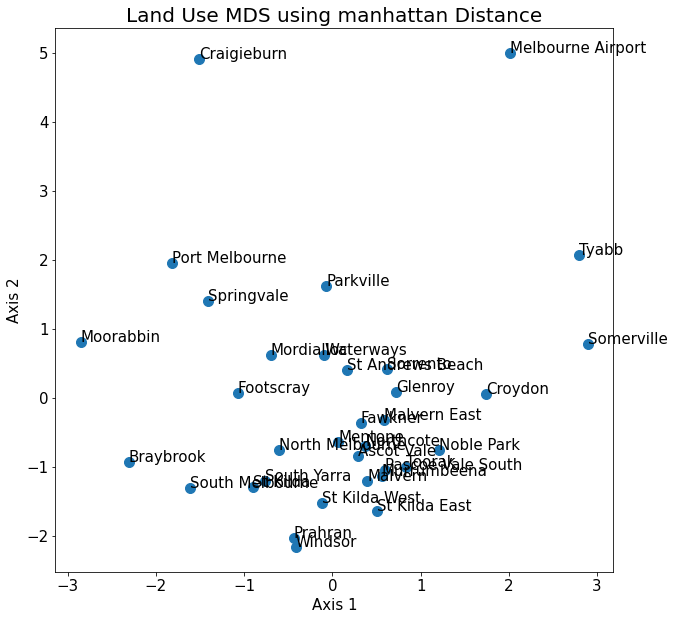

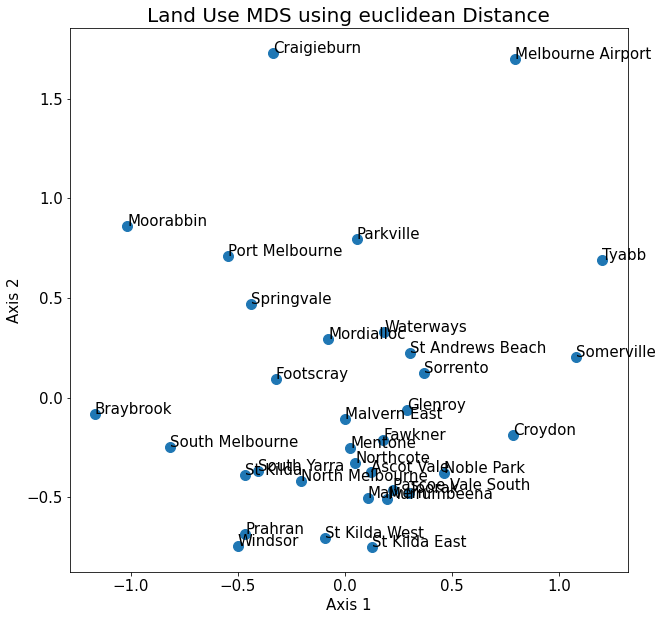

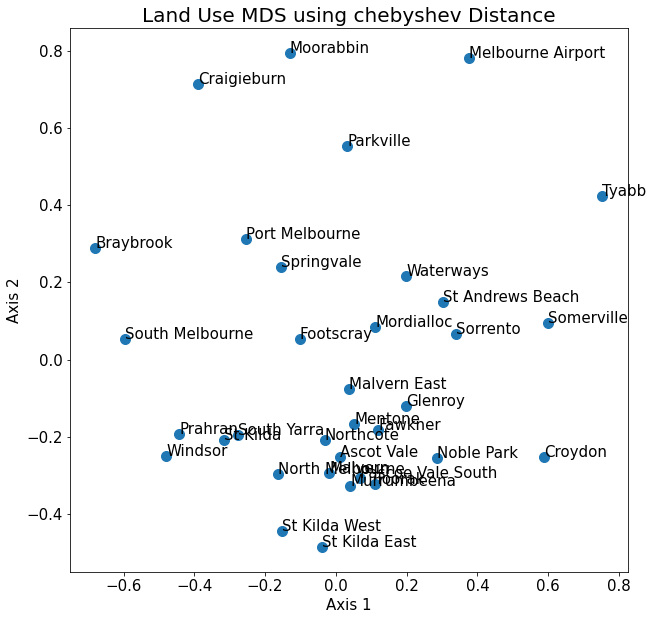

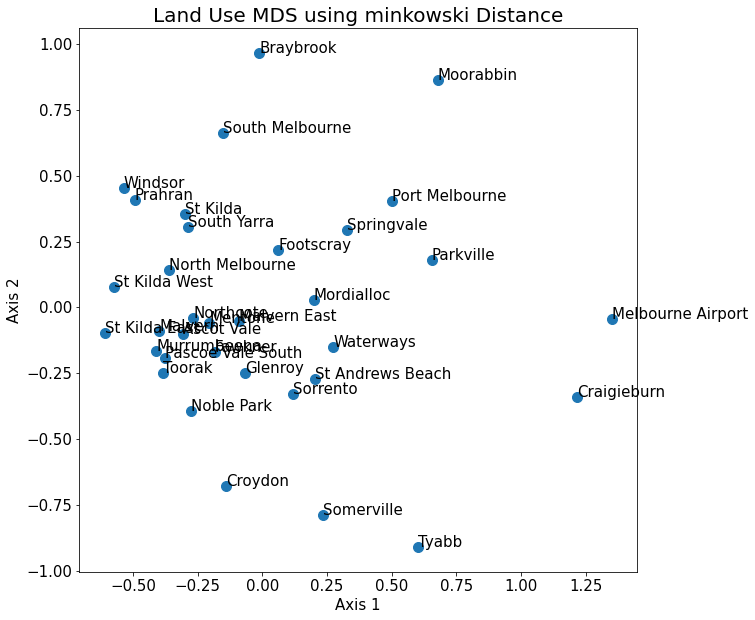

In [95]:
distance_metrics = ["manhattan", "euclidean", "chebyshev", "minkowski"]

for metrics in distance_metrics:
    if metrics == "minkowski": 
        dist = DistanceMetric.get_metric(metrics, p = 3)
    else:
        dist = DistanceMetric.get_metric(metrics)
    dist_matrix = dist.pairwise(land_scaled_data)

    mds  = MDS(2, dissimilarity='precomputed', random_state = 2022)
    out  = mds.fit_transform(dist_matrix)

    plt.rcParams['figure.figsize'] = [10, 10]
    plt.rc('font', size=15)
    plt.scatter(out[:,0], out[:,1],s=100)
    plt.xlabel('Axis 1')
    plt.ylabel('Axis 2')
    plt.title('Land Use MDS using '+metrics+' Distance', size=20)

    for i in range(len(suburb_labels)):
        plt.annotate(suburb_labels[i], (out[:,0][i], out[:,1][i]))

    plt.show()

Observations:

Craigieburn, Melbourne Airport, Parkville has langer percentage of it's land use on other sectors such as Craigieburn having 74.61% unused land, Melbourne Airport having  for .......... And these are nearby in the plots obtained.

### Category: Services

In [96]:
services_columns = ['Public Hospitals','Private Hospitals','Community Health Centres','Bush Nursing Centres','Allied Health','Alternative Health','Child Protection and Family','Dental',
               'Disability','General Practice','Homelessness','Mental Health','Pharmacies','Aged Care (High Care)','Aged Care (Low Care)','Aged Care (SRS)','Kinder and/or Childcare',
               'Primary Schools','Secondary Schools','P12 Schools','Other Schools','Centrelink Offices','Medicare Offices','Medicare Access Points','Community Name', 'Area (km^2)', 
               'Population Density']
               
print("Number of selected features: ", len(services_columns))

Number of selected features:  27


In [97]:
service_data = data.loc[:,services_columns]

In [98]:
suburbs       = service_data['Community Name']
suburb_labels = []

for i in range(len(suburbs)):
    suburb_labels.append(suburbs[i].replace(' (Suburb)',''))

service_data.drop('Community Name', inplace=True, axis=1)

In [99]:
scaler  = MinMaxScaler()

service_scaled_data  = scaler.fit_transform(service_data)

In [100]:
for feature, data_min, data_max, data_scale, data_range in zip(scaler.feature_names_in_, scaler.data_min_, scaler.data_max_, scaler.scale_, scaler.data_range_):
    print("Feature: ", feature, "Min: ", data_min, "Max: ", data_max, "Scale: ", data_scale, "Range: ", data_range) 

Feature:  Public Hospitals Min:  0.0 Max:  4.0 Scale:  0.25 Range:  4.0
Feature:  Private Hospitals Min:  0.0 Max:  4.0 Scale:  0.25 Range:  4.0
Feature:  Community Health Centres Min:  0.0 Max:  6.0 Scale:  0.16666666666666666 Range:  6.0
Feature:  Bush Nursing Centres Min:  0.0 Max:  0.0 Scale:  1.0 Range:  0.0
Feature:  Allied Health Min:  0.0 Max:  85.0 Scale:  0.011764705882352941 Range:  85.0
Feature:  Alternative Health Min:  0.0 Max:  16.0 Scale:  0.0625 Range:  16.0
Feature:  Child Protection and Family Min:  0.0 Max:  9.0 Scale:  0.1111111111111111 Range:  9.0
Feature:  Dental Min:  0.0 Max:  15.0 Scale:  0.06666666666666667 Range:  15.0
Feature:  Disability Min:  0.0 Max:  13.0 Scale:  0.07692307692307693 Range:  13.0
Feature:  General Practice Min:  0.0 Max:  27.0 Scale:  0.037037037037037035 Range:  27.0
Feature:  Homelessness Min:  0.0 Max:  12.0 Scale:  0.08333333333333333 Range:  12.0
Feature:  Mental Health Min:  0.0 Max:  26.0 Scale:  0.038461538461538464 Range:  26.0

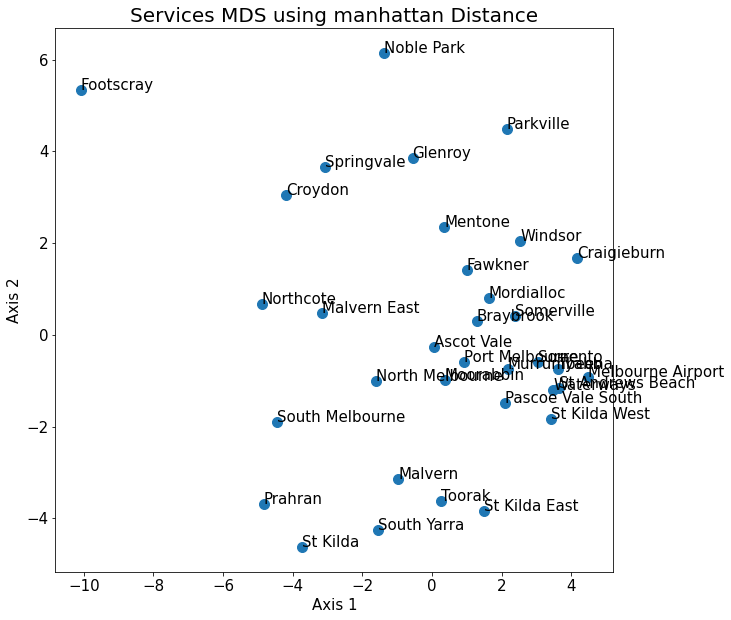

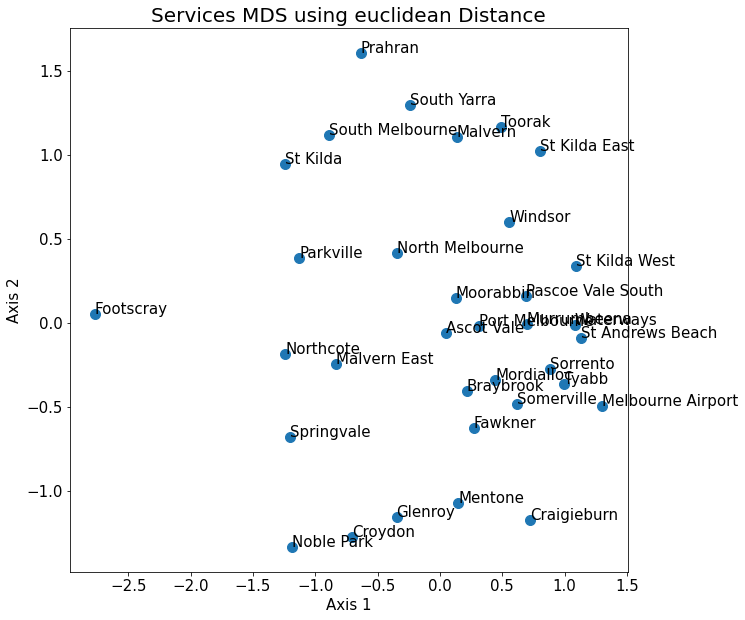

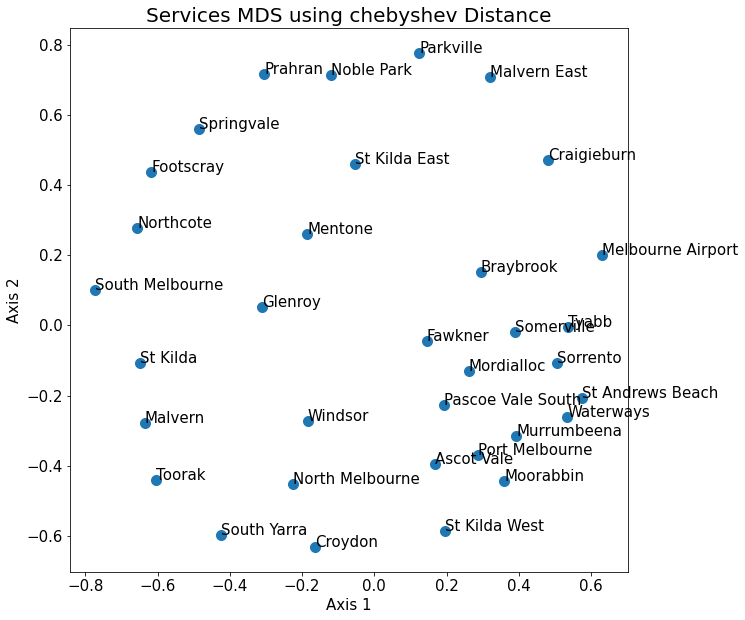

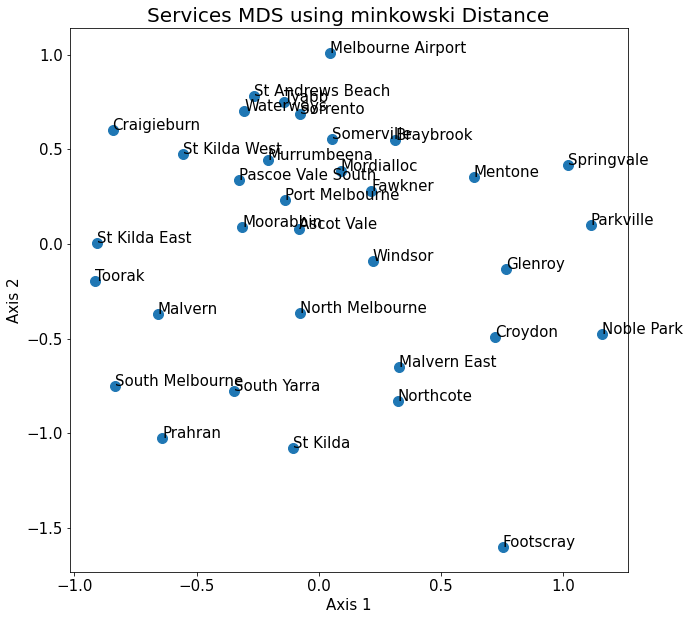

In [101]:
distance_metrics = ["manhattan", "euclidean", "chebyshev", "minkowski"]

for metrics in distance_metrics:
    if metrics == "minkowski": 
        dist = DistanceMetric.get_metric(metrics, p = 3)
    else:
        dist = DistanceMetric.get_metric(metrics)
    dist_matrix = dist.pairwise(service_scaled_data)

    mds  = MDS(2, dissimilarity='precomputed', random_state = 2022)
    out  = mds.fit_transform(dist_matrix)

    plt.rcParams['figure.figsize'] = [10, 10]
    plt.rc('font', size=15)
    plt.scatter(out[:,0], out[:,1],s=100)
    plt.xlabel('Axis 1')
    plt.ylabel('Axis 2')
    plt.title('Services MDS using '+metrics+' Distance', size=20)

    for i in range(len(suburb_labels)):
        plt.annotate(suburb_labels[i], (out[:,0][i], out[:,1][i]))

    plt.show()

In [102]:
demographic_columns = ['Number of Households','Average persons per household','Occupied private dwellings','Occupied private dwellings, %','Population in non-private dwellings','Public Housing Dwellings',
                        'Dwellings with no motor vehicle','Dwellings with no internet','Dwellings with no internet, %',
                        'Equivalent household income <$600/week','Equivalent household income <$600/week, %','Personal income <$400/week, persons','Personal income <$400/week, %','Number of families',
                        'Female-headed lone parent families','Male-headed lone parent families','% residing near PT',
                        'IRSD (min)','IRSD (max)','IRSD (avg)','Primary school students','Secondary school students','TAFE students','University students','Holds degree or higher, persons',
                        'Holds degree or higher, %','Did not complete year 12, persons','Did not complete year 12, %','Unemployed, persons','Volunteers, persons','Volunteers, %',
                        'Requires assistance with core activities, persons','Aged 75+ and lives alone, persons',
                        'Unpaid carer to person with disability, persons','Unpaid carer to person with disability, %','Unpaid carer of children, persons','Unpaid carer of children, %','Top industry',
                        'Top industry, %','2nd top industry - persons','2nd top industry, %','3rd top industry - persons','3rd top industry, %','Top occupation','Top occupation, %',
                        '2nd top occupation - persons','2nd top occupation, %','3rd top occupation - persons','3rd top occupation, %','Community Name']

print("Number of selected features: ", len(demographic_columns))

Number of selected features:  50


In [103]:
demographic_data = data.loc[:,demographic_columns]

for i in range(len(demographic_data)):
    for j in range(1,50):
        if demographic_data.iloc[i,j]=='<5':
            demographic_data.iloc[i,j] =  5

In [104]:
suburbs       = demographic_data['Community Name']
suburb_labels = []

for i in range(len(suburbs)):
    suburb_labels.append(suburbs[i].replace(' (Suburb)',''))

demographic_data.drop('Community Name', inplace=True, axis=1)

In [105]:
scaler  = MinMaxScaler()

demographic_scaled_data  = scaler.fit_transform(demographic_data)

In [106]:
for feature, data_min, data_max, data_scale, data_range in zip(scaler.feature_names_in_, scaler.data_min_, scaler.data_max_, scaler.scale_, scaler.data_range_):
    print("Feature: ", feature, "Min: ", data_min, "Max: ", data_max, "Scale: ", data_scale, "Range: ", data_range) 

Feature:  Number of Households Min:  19.0 Max:  11293.0 Scale:  8.869966294128082e-05 Range:  11274.0
Feature:  Average persons per household Min:  1.96879334257975 Max:  7.368421052631579 Scale:  0.18519795321044485 Range:  5.399627710051829
Feature:  Occupied private dwellings Min:  32.0 Max:  10538.0 Scale:  9.518370454978108e-05 Range:  10506.0
Feature:  Occupied private dwellings, % Min:  21.75703500343171 Max:  100.0 Scale:  0.012780701754385965 Range:  78.24296499656829
Feature:  Population in non-private dwellings Min:  5.0 Max:  3490.0 Scale:  0.00028694404591104734 Range:  3485.0
Feature:  Public Housing Dwellings Min:  5.0 Max:  1870.0 Scale:  0.0005361930294906167 Range:  1865.0
Feature:  Dwellings with no motor vehicle Min:  5.0 Max:  2379.0 Scale:  0.00042122999157540015 Range:  2374.0
Feature:  Dwellings with no internet Min:  6.0 Max:  2813.0 Scale:  0.0003562522265764161 Range:  2807.0
Feature:  Dwellings with no internet, % Min:  4.845814977973569 Max:  31.39022855944

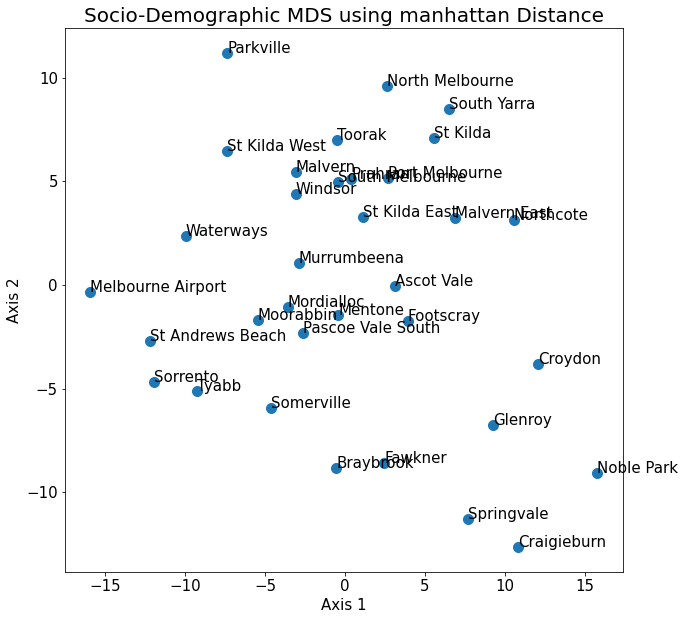

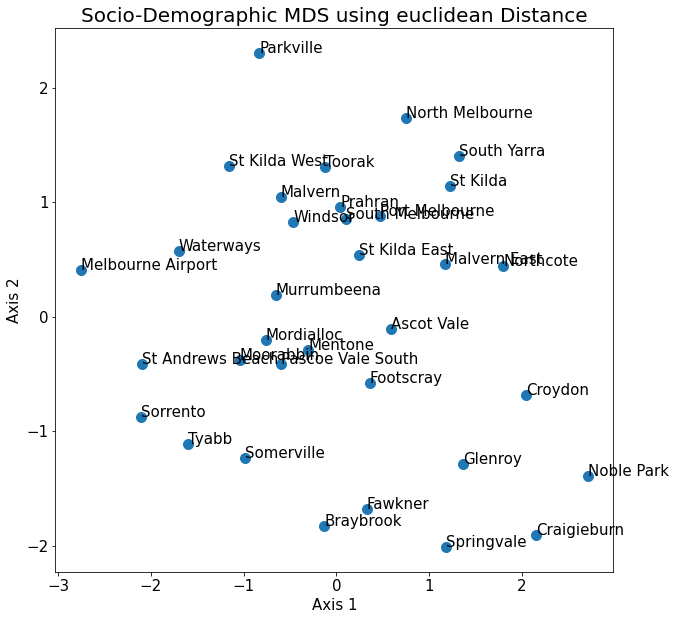

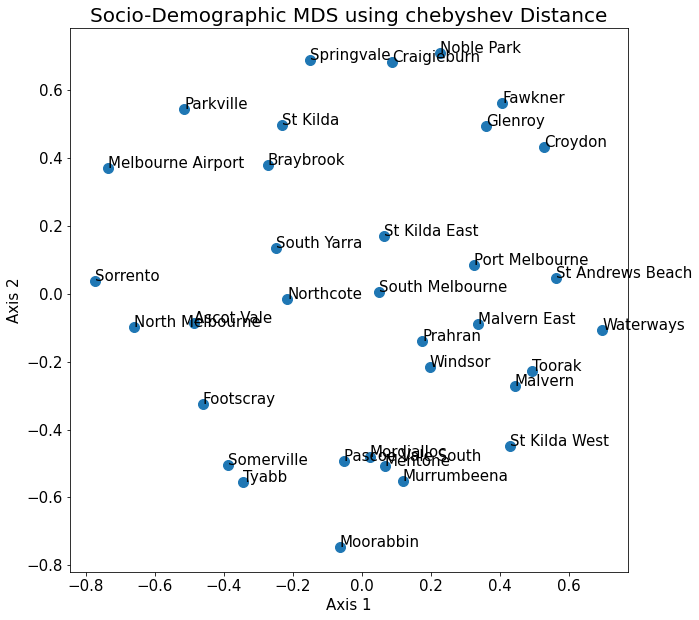

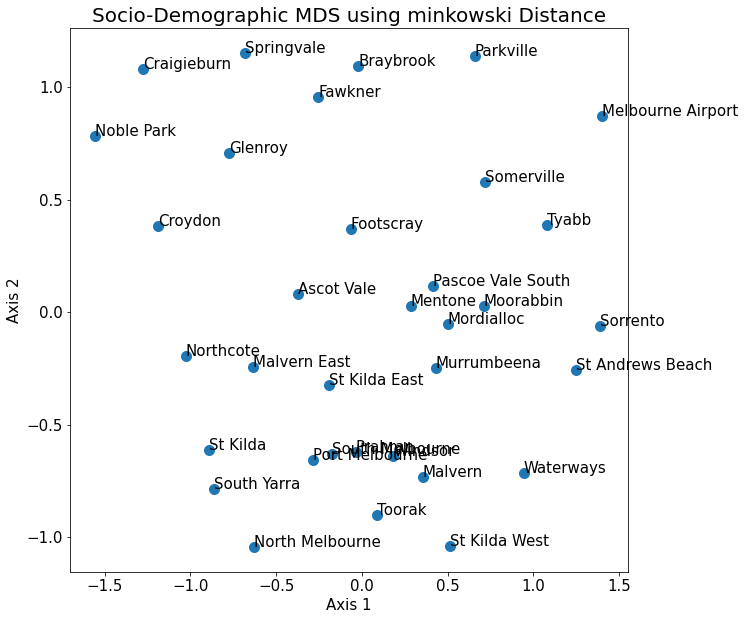

In [107]:
distance_metrics = ["manhattan", "euclidean", "chebyshev", "minkowski"]

for metrics in distance_metrics:
    if metrics == "minkowski": 
        dist = DistanceMetric.get_metric(metrics, p = 3)
    else:
        dist = DistanceMetric.get_metric(metrics)
    dist_matrix = dist.pairwise(demographic_scaled_data)

    mds  = MDS(2, dissimilarity='precomputed', random_state = 2022)
    out  = mds.fit_transform(dist_matrix)

    plt.rcParams['figure.figsize'] = [10, 10]
    plt.rc('font', size=15)
    plt.scatter(out[:,0], out[:,1],s=100)
    plt.xlabel('Axis 1')
    plt.ylabel('Axis 2')
    plt.title('Socio-Demographic MDS using '+metrics+' Distance', size=20)

    for i in range(len(suburb_labels)):
        plt.annotate(suburb_labels[i], (out[:,0][i], out[:,1][i]))

    plt.show()

## Question A.3

### Finding the proximity of suburbs

In [108]:
geography_columns = ['Community Name','Map reference','Region','Grid reference',
                     'LGA','Primary Care Partnership','Medicare Local','DHS Area',
                     'Grid reference','Population Density','Travel time to GPO (minutes)',
                     'Distance to GPO (km)','LGA','Primary Care Partnership','Medicare Local',
                     'Distance','Direction','Area (km^2)']

print("Number of selected features: ", len(geography_columns))

Number of selected features:  18


In [109]:
geo_data = data.loc[:,geography_columns]

In [110]:
suburbs       = geo_data['Community Name']
suburb_labels = []

for i in range(len(suburbs)):
    suburb_labels.append(suburbs[i].replace(' (Suburb)',''))

geo_data.drop('Community Name', inplace=True, axis=1)

In [111]:
scaler  = MinMaxScaler()

geo_scaled_data  = scaler.fit_transform(geo_data)

### Feature Attribute:

**scale_** ndarray of shape (n_features,)  
Per feature relative scaling of the data.   
Equivalent to (max - min) / (X.max(axis=0) - X.min(axis=0))

**data_min_** ndarray of shape (n_features,)  
Per feature minimum seen in the data

**data_max_** ndarray of shape (n_features,)  
Per feature maximum seen in the data

**data_range_** ndarray of shape (n_features,)  
Per feature range (data_max_ - data_min_) seen in the data

In [112]:
for feature, data_min, data_max, data_scale, data_range in zip(scaler.feature_names_in_, scaler.data_min_, scaler.data_max_, scaler.scale_, scaler.data_range_):
    print("Feature: ", feature, "Min: ", data_min, "Max: ", data_max, "Scale: ", data_scale, "Range: ", data_range) 

Feature:  Map reference Min:  1.0 Max:  5.0 Scale:  0.25 Range:  4.0
Feature:  Region Min:  0.0 Max:  2.0 Scale:  0.5 Range:  2.0
Feature:  Grid reference Min:  0.0 Max:  15.0 Scale:  0.06666666666666667 Range:  15.0
Feature:  LGA Min:  0.0 Max:  12.0 Scale:  0.08333333333333333 Range:  12.0
Feature:  Primary Care Partnership Min:  0.0 Max:  8.0 Scale:  0.125 Range:  8.0
Feature:  Medicare Local Min:  0.0 Max:  6.0 Scale:  0.16666666666666666 Range:  6.0
Feature:  DHS Area Min:  0.0 Max:  5.0 Scale:  0.2 Range:  5.0
Feature:  Grid reference Min:  0.0 Max:  15.0 Scale:  0.06666666666666667 Range:  15.0
Feature:  Population Density Min:  5.200814823652639 Max:  7020.296345791986 Scale:  0.00014254973372571653 Range:  7015.095530968333
Feature:  Travel time to GPO (minutes) Min:  4.83188850845 Max:  82.8215226078 Scale:  0.01282221684392201 Range:  77.98963409935001
Feature:  Distance to GPO (km) Min:  3.35458496333 Max:  106.83926235 Scale:  0.009663266342934082 Range:  103.48467738667
F

Euclidean distance tends to underestimate road distance and travel time;  
 Manhattan distance tends to overestimate both.

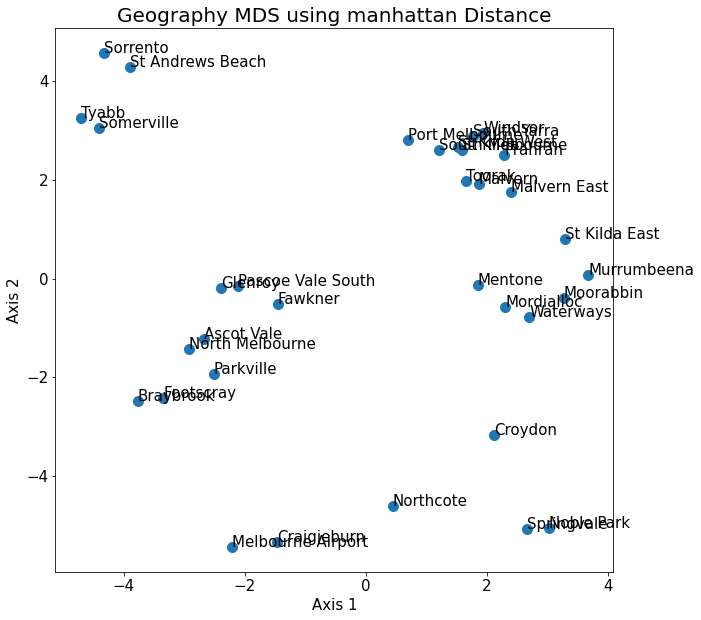

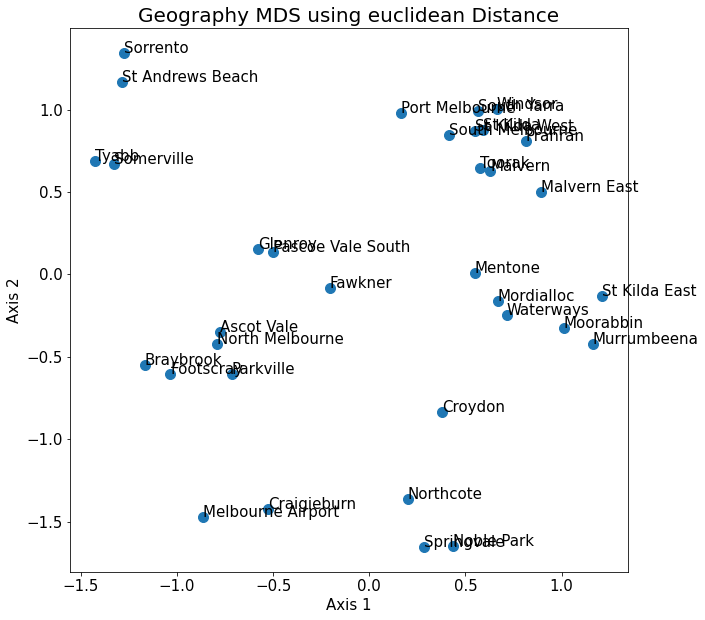

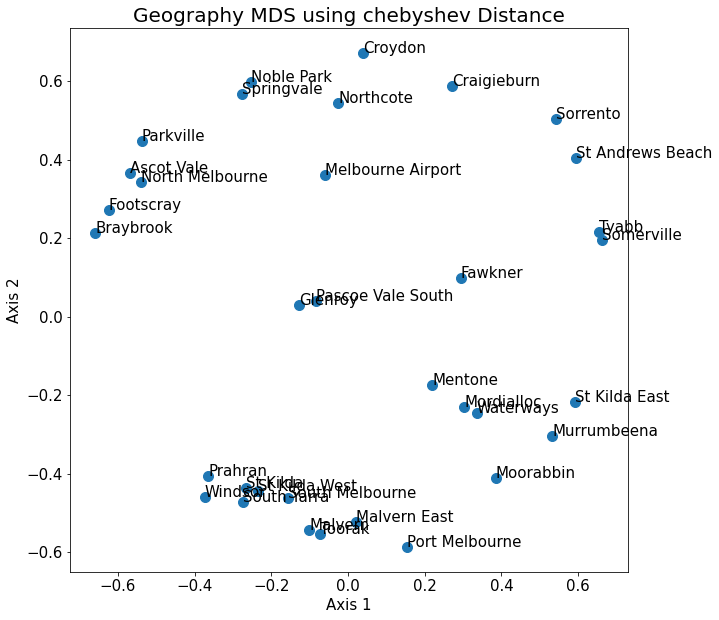

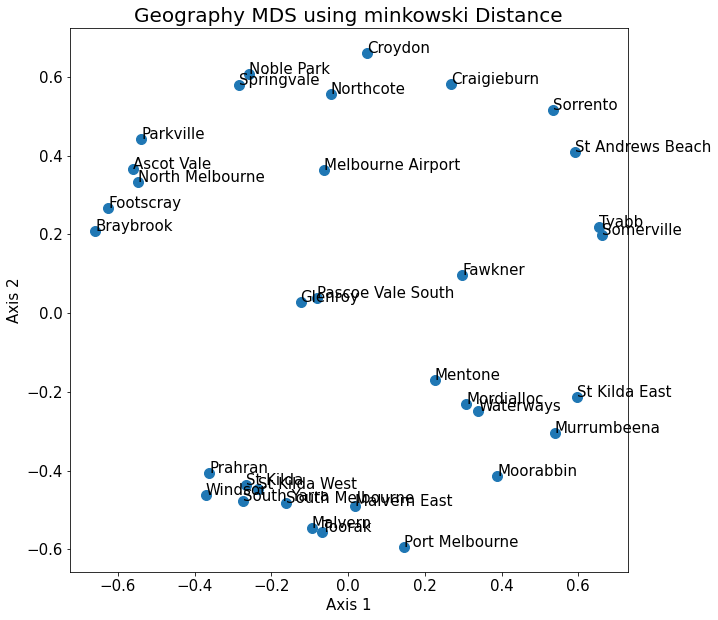

In [113]:
distance_metrics = ["manhattan", "euclidean", "chebyshev", "minkowski"]

for metrics in distance_metrics:
    if metrics == "minkowski": 
        dist = DistanceMetric.get_metric(metrics, p = 100)
    else:
        dist = DistanceMetric.get_metric(metrics)
    dist_matrix = dist.pairwise(geo_scaled_data)

    mds  = MDS(2, dissimilarity='precomputed', random_state = 2022)
    out  = mds.fit_transform(dist_matrix)

    plt.rcParams['figure.figsize'] = [10, 10]
    plt.rc('font', size=15)
    plt.scatter(out[:,0], out[:,1],s=100)
    plt.xlabel('Axis 1')
    plt.ylabel('Axis 2')
    plt.title('Geography MDS using '+metrics+' Distance', size=20)

    for i in range(len(suburb_labels)):
        plt.annotate(suburb_labels[i], (out[:,0][i], out[:,1][i]))

    plt.show()

## Section B

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [31]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))

In [115]:
y = data["Community Name"] 

In [116]:
y

0               Mentone (Suburb)
1        Port Melbourne (Suburb)
2             Northcote (Suburb)
3       South Melbourne (Suburb)
4           Murrumbeena (Suburb)
5               Glenroy (Suburb)
6              St Kilda (Suburb)
7                 Tyabb (Suburb)
8           South Yarra (Suburb)
9            Noble Park (Suburb)
10          Craigieburn (Suburb)
11             Sorrento (Suburb)
12            Braybrook (Suburb)
13           Mordialloc (Suburb)
14        St Kilda West (Suburb)
15           Ascot Vale (Suburb)
16               Toorak (Suburb)
17         Malvern East (Suburb)
18              Prahran (Suburb)
19            Moorabbin (Suburb)
20    Melbourne Airport (Suburb)
21            Parkville (Suburb)
22     St Andrews Beach (Suburb)
23            Footscray (Suburb)
24    Pascoe Vale South (Suburb)
25      North Melbourne (Suburb)
26           Springvale (Suburb)
27        St Kilda East (Suburb)
28              Windsor (Suburb)
29              Malvern (Suburb)
30        

In [117]:
X = data.drop('ABS remoteness category', inplace=True, axis=1)

In [118]:
X = data.drop("Community Name", inplace=True, axis=1)

In [39]:
data.shape

(34, 225)

In [123]:
data = data.fillna(0)

In [124]:
scaler  = MinMaxScaler()

scaled_data  = scaler.fit_transform(data)

In [125]:
for feature, data_min, data_max, data_scale, data_range in zip(scaler.feature_names_in_, scaler.data_min_, scaler.data_max_, scaler.scale_, scaler.data_range_):
    print("Feature: ", feature, "Min: ", data_min, "Max: ", data_max, "Scale: ", data_scale, "Range: ", data_range) 

Feature:  Region Min:  0.0 Max:  2.0 Scale:  0.5 Range:  2.0
Feature:  Map reference Min:  1.0 Max:  5.0 Scale:  0.25 Range:  4.0
Feature:  Grid reference Min:  0.0 Max:  15.0 Scale:  0.06666666666666667 Range:  15.0
Feature:  Population Density Min:  5.200814823652639 Max:  7020.296345791986 Scale:  0.00014254973372571653 Range:  7015.095530968333
Feature:  Travel time to GPO (minutes) Min:  4.83188850845 Max:  82.8215226078 Scale:  0.01282221684392201 Range:  77.98963409935001
Feature:  Distance to GPO (km) Min:  3.35458496333 Max:  106.83926235 Scale:  0.009663266342934082 Range:  103.48467738667
Feature:  LGA Min:  0.0 Max:  12.0 Scale:  0.08333333333333333 Range:  12.0
Feature:  Primary Care Partnership Min:  0.0 Max:  8.0 Scale:  0.125 Range:  8.0
Feature:  Medicare Local Min:  0.0 Max:  6.0 Scale:  0.16666666666666666 Range:  6.0
Feature:  Area (km^2) Min:  0.5286748372306476 Max:  35.31403738790105 Scale:  0.0287477239469142 Range:  34.785362550670406
Feature:  ARIA+ (min) Min:

In [139]:
feature_num = []

for c in range(100, 0, -1):
    sel_ = SelectFromModel(LogisticRegression(C=1/c, penalty='l1', solver='liblinear'))
    sel_.fit(scaled_data, y)
    feature_num.append(sum(sel_.get_support()))

for c in range(1, 100):
    sel_ = SelectFromModel(LogisticRegression(C=c, penalty='l1', solver='liblinear'))
    sel_.fit(scaled_data, y)
    feature_num.append(sum(sel_.get_support()))

AttributeError: ignored

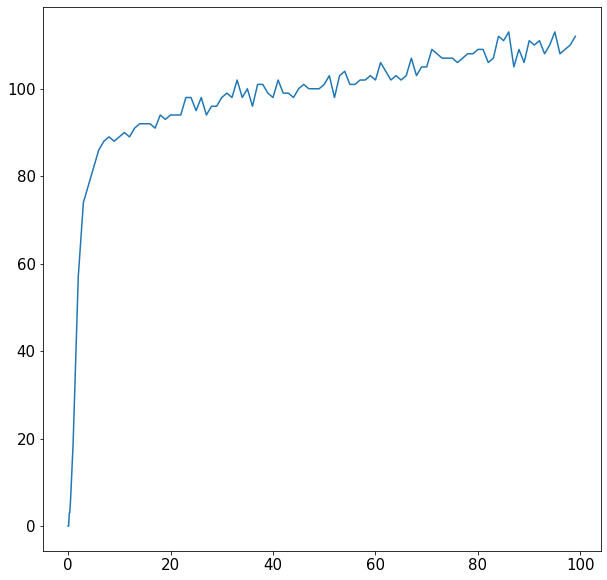

In [127]:
x_axis = [1/x for x in range(100, 0, -1)] + [x for x in range(1, 100)]
plt.plot(x_axis, feature_num)
plt.show()

In [134]:
sel_ = SelectFromModel(LogisticRegression(C=1/50, penalty='l1', solver='liblinear'))
sel_.fit(data.fillna(0), y)
sel_.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [135]:
sum(sel_.get_support())

34

In [136]:
column_names = list(data.columns.values)
features_sel = sel_.get_support()
selected_feature = []
for idx, column in enumerate(column_names):
    if features_sel[idx]:
      selected_feature.append(column)

print(selected_feature)


['Population Density', '2012 ERP age 20-24, persons', '2012 ERP age 25-44, persons', '2012 ERP age 45-64, persons', '2012 ERP, total', '2007 ERP age 20-24, persons', '2007 ERP age 25-44, persons', '2007 ERP age 45-64, persons', '2007 ERP age 85+, persons', '2007 ERP, total', '% change, 2007-2012, age 80-84', '% change, 2007-2012, age 85+', 'Number of Households', 'Occupied private dwellings', 'Population in non-private dwellings', 'Public Housing Dwellings', 'Personal income <$400/week, persons', 'IRSD (min)', 'IRSD (max)', 'IRSD (avg)', 'Holds degree or higher, persons', 'Did not complete year 12, persons', 'Volunteers, persons', 'Unpaid carer of children, persons', 'Born overseas, persons', 'Born in non-English speaking country, persons', 'Speaks LOTE at home, persons', 'Top country of birth, persons', '2nd top country of birth, persons', 'Top language spoken, persons', '2nd top language spoken, persons', 'Public hospital separations, 2012-13', 'Presentations to emergency departments

In [137]:
selected_data = data.loc[:,selected_feature]

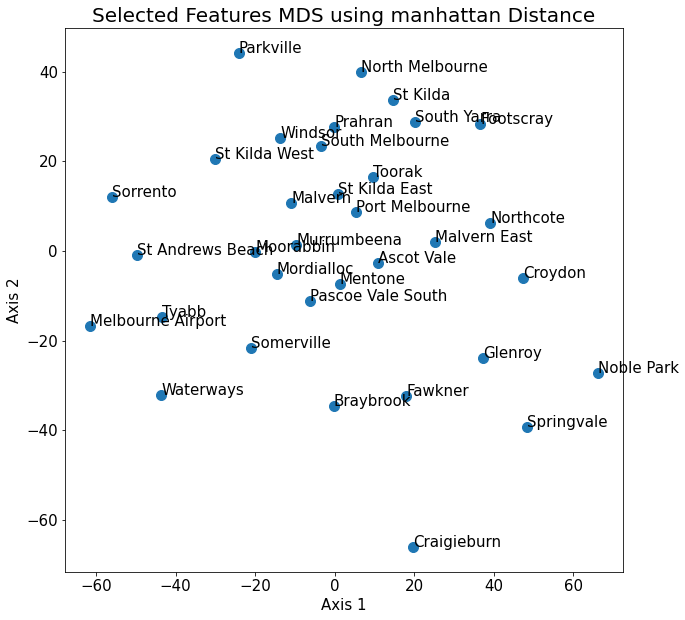

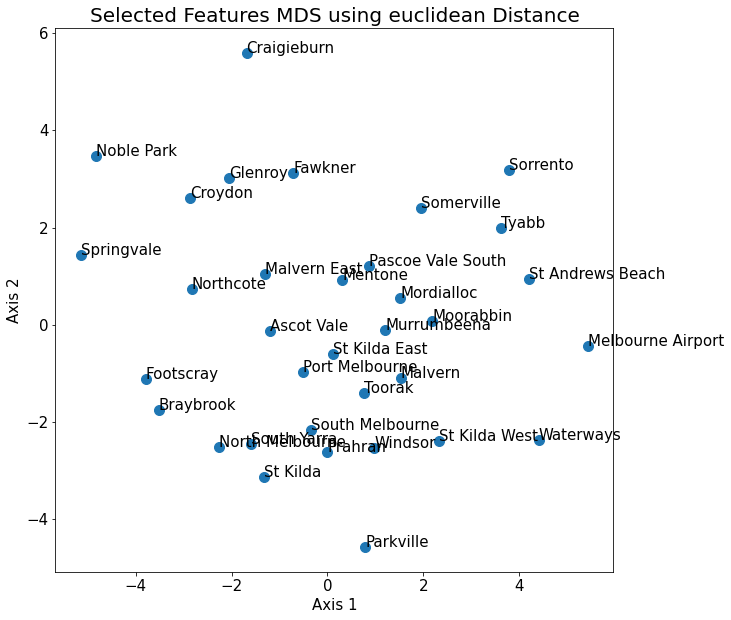

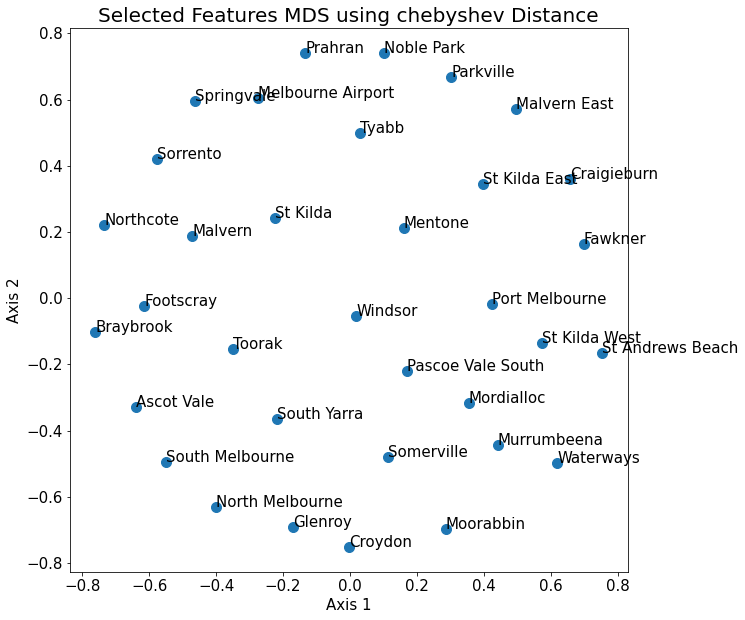

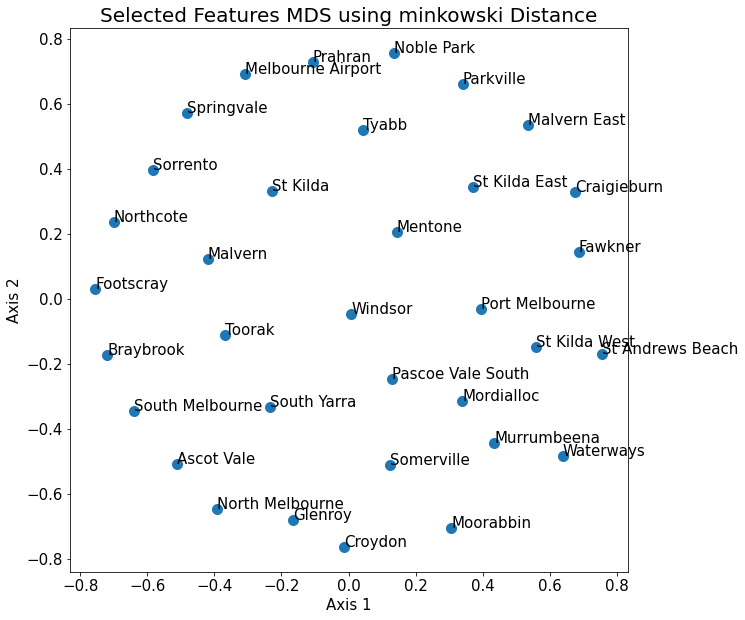

In [138]:
distance_metrics = ["manhattan", "euclidean", "chebyshev", "minkowski"]

for metrics in distance_metrics:
    if metrics == "minkowski": 
        dist = DistanceMetric.get_metric(metrics, p = 100)
    else:
        dist = DistanceMetric.get_metric(metrics)
    dist_matrix = dist.pairwise(scaled_data)

    mds  = MDS(2, dissimilarity='precomputed', random_state = 2022)
    out  = mds.fit_transform(dist_matrix)

    plt.rcParams['figure.figsize'] = [10, 10]
    plt.rc('font', size=15)
    plt.scatter(out[:,0], out[:,1],s=100)
    plt.xlabel('Axis 1')
    plt.ylabel('Axis 2')
    plt.title('Selected Features MDS using '+metrics+' Distance', size=20)

    for i in range(len(suburb_labels)):
        plt.annotate(suburb_labels[i], (out[:,0][i], out[:,1][i]))

    plt.show()

In [173]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=2022)

In [174]:
kmeans.fit(scaled_data)

KMeans(n_clusters=5, random_state=2022)

In [175]:
class_labels = list(kmeans.labels_)
colors ={'0':'r','1':'b','2':'y','3':'g', '4':'orange'}

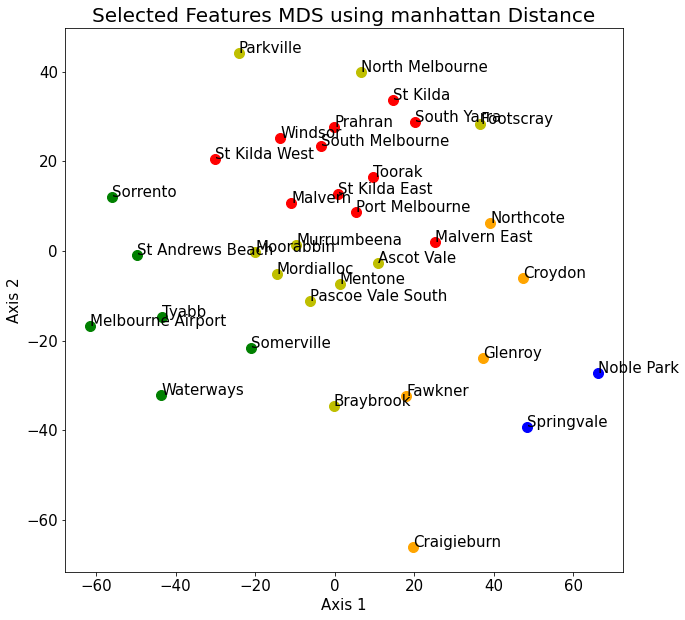

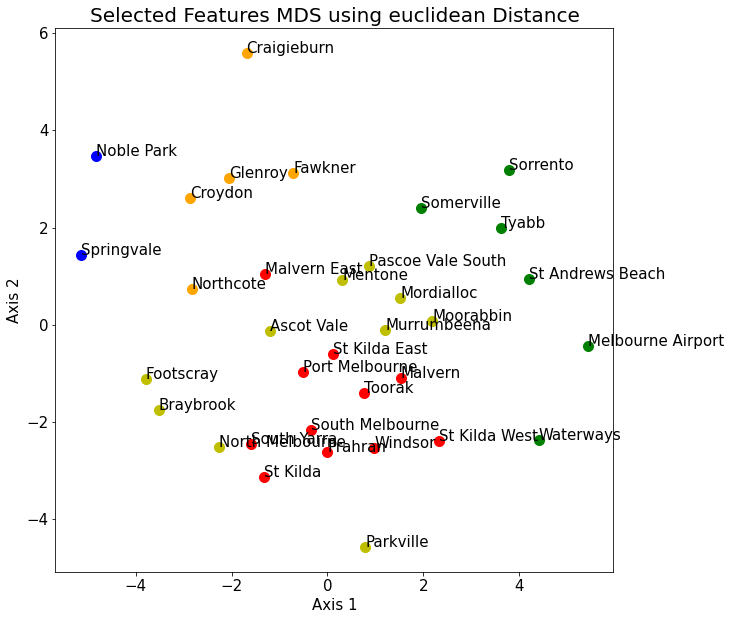

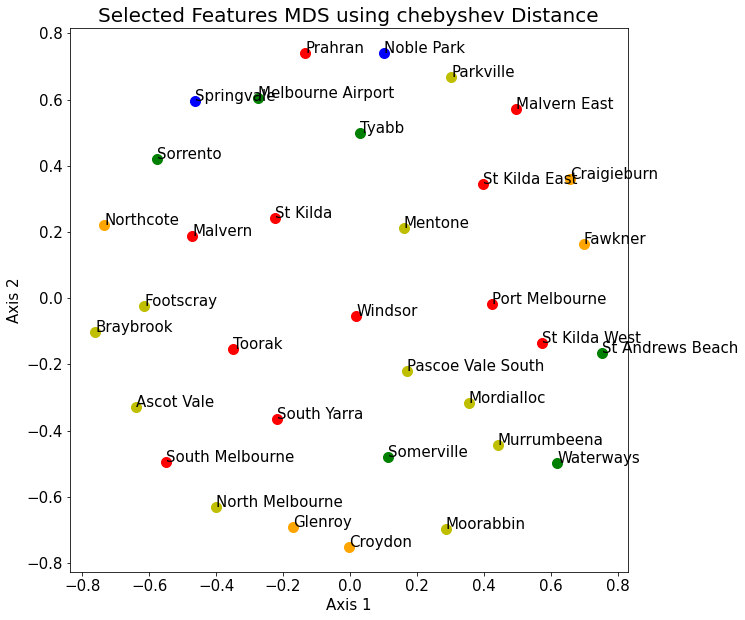

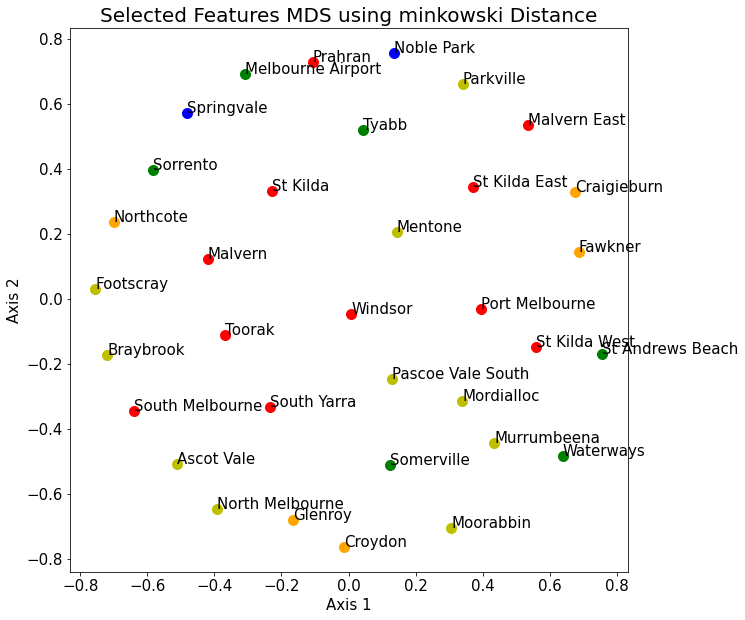

In [176]:
distance_metrics = ["manhattan", "euclidean", "chebyshev", "minkowski"]

for metrics in distance_metrics:
    if metrics == "minkowski": 
        dist = DistanceMetric.get_metric(metrics, p = 100)
    else:
        dist = DistanceMetric.get_metric(metrics)
    dist_matrix = dist.pairwise(scaled_data)

    mds  = MDS(2, dissimilarity='precomputed', random_state = 2022)
    out  = mds.fit_transform(dist_matrix)

    plt.rcParams['figure.figsize'] = [10, 10]
    plt.rc('font', size=15)
    for i in range(len(class_labels)):
        plt.scatter(out[i,0], out[i,1],s=100, color=colors[str(class_labels[i])])
    plt.xlabel('Axis 1')
    plt.ylabel('Axis 2')
    plt.title('Selected Features MDS using '+metrics+' Distance', size=20)

    for i in range(len(suburb_labels)):
        plt.annotate(suburb_labels[i], (out[:,0][i], out[:,1][i]))

    plt.show()

In [178]:
hist_commercial = [[], [], [], [], []]
for i in range(len(class_labels)):
    hist_commercial[class_labels[i]].append((data['Commercial (%)'][i], i))

hist_industrial = [[], [], [], [], []]
for i in range(len(class_labels)):
    hist_industrial[class_labels[i]].append((data['Industrial (%)'][i], i))

hist_residential = [[], [], [], [], []]
for i in range(len(class_labels)):
    hist_residential[class_labels[i]].append((data['Residential (%)'][i], i))

hist_rural = [[], [], [], [], []]
for i in range(len(class_labels)):
    hist_rural[class_labels[i]].append((data['Rural (%)'][i], i))

hist_other = [[], [], [], [], []]
for i in range(len(class_labels)):
    hist_other[class_labels[i]].append((data['Other (%)'][i], i))

In [158]:
data['Commercial (%)'][0]

6.169275560657048

In [161]:
hist_industrial

[[3.275744402231773,
  13.88789188905172,
  0.4753606372030802,
  1.174397634509756,
  0.0,
  0.0,
  19.43649977558415,
  0.0,
  0.1327840209157633,
  0.0,
  0.0,
  0.0,
  49.24655164026461,
  3.676833806184475,
  0.0,
  15.36468922890581,
  0.0,
  0.0,
  0.0],
 [2.749727607715194,
  1.044399743150474,
  1.263395115437698,
  4.992626131086488,
  12.02333974515187,
  2.871680772098096,
  3.304669070329538],
 [1.308709810714044,
  0.3696566212927317,
  0.3592802953734678,
  0.0,
  2.839738438436819,
  0.001284321485568931],
 [4.112305042243515, 7.094985632527099]]

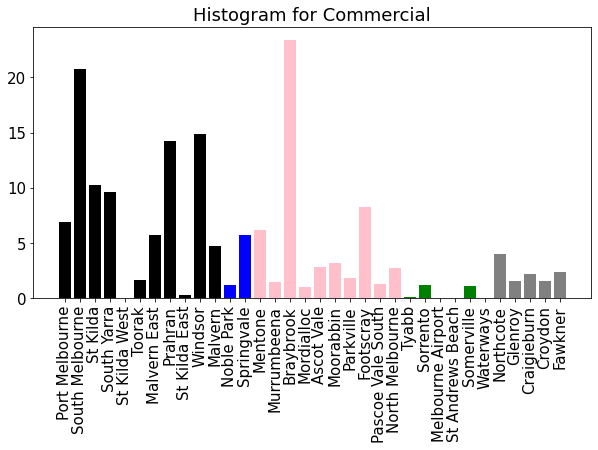

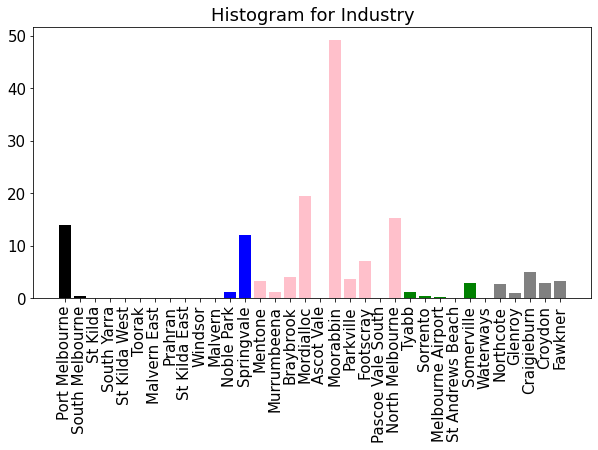

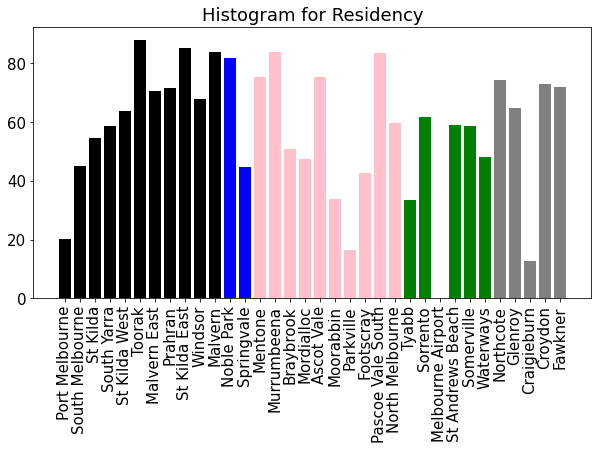

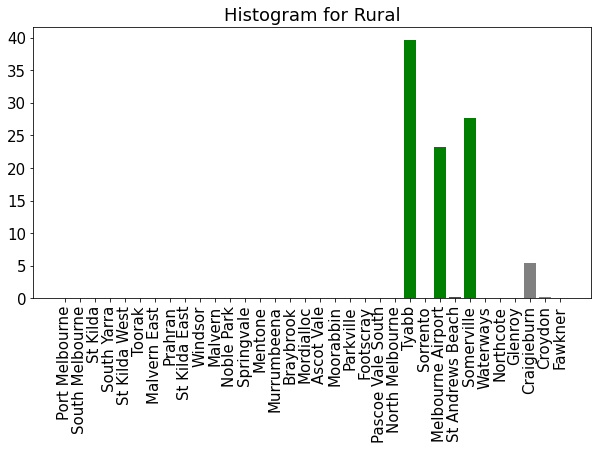

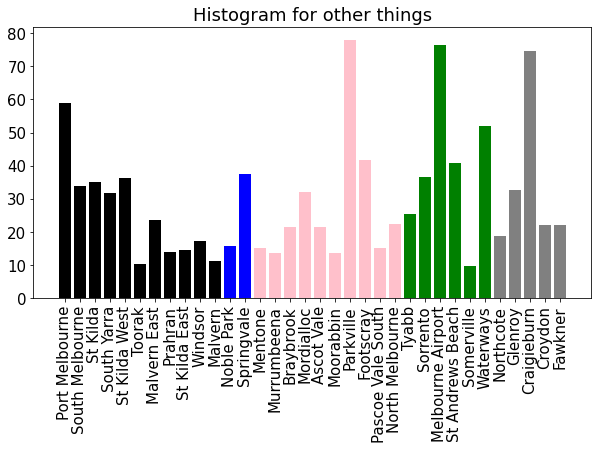

In [187]:
import matplotlib.pyplot as plt
 
#data
hist_commercial
h = [10, 8, 12, 4, 7]
c = ['black', 'blue', 'pink', 'green', 'grey']
plt.title('Histogram for Commercial')

plt.rcParams['figure.figsize'] = [10, 5]
for i in range(5):
    for val, idx in hist_commercial[i]:
      plt.bar(suburb_labels[idx], val, color = c[i])
      plt.xticks(rotation='vertical')
plt.show()

plt.title('Histogram for Industry')
plt.rcParams['figure.figsize'] = [10, 5]
for i in range(5):
    for val, idx in hist_industrial[i]:
      plt.bar(suburb_labels[idx], val, color = c[i])
      plt.xticks(rotation='vertical')
plt.show()

plt.title('Histogram for Residency')
plt.rcParams['figure.figsize'] = [10, 5]
for i in range(5):
    for val, idx in hist_residential[i]:
      plt.bar(suburb_labels[idx], val, color = c[i])
      plt.xticks(rotation='vertical')
plt.show()

plt.title('Histogram for Rural')
plt.rcParams['figure.figsize'] = [10, 5]
for i in range(5):
    for val, idx in hist_rural[i]:
      plt.bar(suburb_labels[idx], val, color = c[i])
      plt.xticks(rotation='vertical')
plt.show()

plt.title('Histogram for other things')
plt.rcParams['figure.figsize'] = [10, 5]
for i in range(5):
    for val, idx in hist_other[i]:
      plt.bar(suburb_labels[idx], val, color = c[i])
      plt.xticks(rotation='vertical')
plt.show()